In [1]:
from pylab import *
from scipy.integrate import *

Masas: 

$M_{Sol} = 1.989 \times 10^30$ kg

$M_{Tierra} = 5.972 \times 10^24$ kg

$M_{Júpiter} = 1.898 \times 10^27$ kg

Distancias:

$D_{Sol-Tierra} = 1$ UA

$D_{Sol-Júpiter} = 5.2$ UA

In [2]:
MT_sol=5.972/1989000
MJ_sol=1.898/1989

In [3]:
def dos_Sol_planteas(t,x,m1M=0,m2M=0):
    #miM=m1M,m2M
    # x = x1,y1,x2,y2,vx1,vy1,vx2,vy2
    #      0 1  2  3   4   5   6   7
    dx1 , dy1 = x[4] , x[5]
    dx2 , dy2 = x[6] , x[7]
    d1M = (x[0]**2 + x[1]**2)**1.5
    d2M = (x[2]**2 + x[3]**2)**1.5
    d12 = ((x[0]-x[2])**2 + (x[1]-x[3])**2)**1.5
    dvx1 = -x[0]/d1M + m2M*(x[2]-x[0])/d12
    dvy1 = -x[1]/d1M + m2M*(x[3]-x[1])/d12
    dvx2 = -x[2]/d2M - m2M*(x[2]-x[0])/d12
    dvy2 = -x[3]/d2M - m2M*(x[3]-x[1])/d12
    return array([dx1,dy1,dx2,dy2,dvx1,dvy1,dvx2,dvy2])

In [43]:
ci = [1,0,5.2,0,0,1,0,5.2/11.86]
t_final=10*2*pi*11.86
solucion = solve_ivp(dos_Sol_planteas,(0,t_final),ci,
                    rtol=1e-8, atol=1e-8, args=([MT_sol,10*MJ_sol]),dense_output=True) #covierte la soluciónn de saliada en algo que se puede interpolar

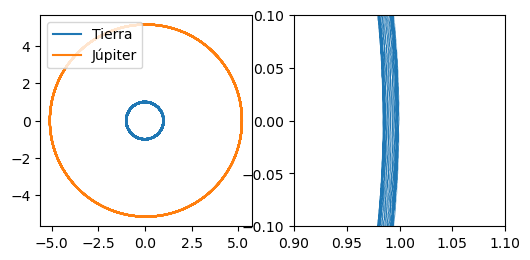

In [44]:
figura,ejes=subplots(1,2,dpi=100)
ejes[0].plot(solucion.y[0],solucion.y[1],label='Tierra')
ejes[0].plot(solucion.y[2],solucion.y[3],label='Júpiter')
ejes[0].set_aspect('equal')
ejes[0].legend()
#
ejes[1].plot(solucion.y[0],solucion.y[1], lw=0.1,label='Tierra')
ejes[1].plot(solucion.y[2],solucion.y[3],label='Júpiter gordito')
ejes[1].set_xlim([0.9,1.1])
ejes[1].set_ylim([-0.1,0.1])
ejes[1].set_aspect('equal')
show()



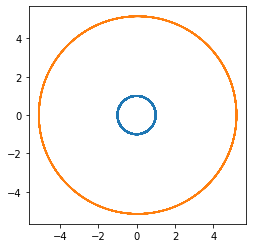

In [45]:
plot(solucion.y[0],solucion.y[1],label='Tierra')
plot(solucion.y[2],solucion.y[3],label='Júpiter')
gca().set_aspect('equal')
show()

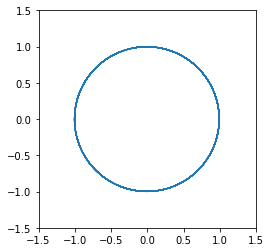

In [46]:
plot(solucion.y[0],solucion.y[1], lw=0.1,label='Tierra')
plot(solucion.y[2],solucion.y[3], lw=0.1,label='Júpiter')
xlim([-1.5,1.5]),ylim([-1.5,1.5])
gca().set_aspect('equal')
show()

In [47]:
def fun1(a,b=2,c=3):
    print(a,b,c)

def fun2(a, argumentos=None):
    fun1(a,argumentos)

In [48]:
fun2(1,8)

1 8 3


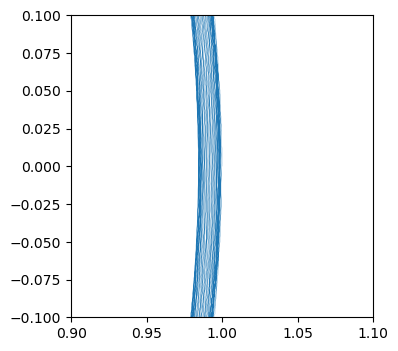

In [49]:
figure(dpi=100)
plot(solucion.y[0],solucion.y[1], lw=0.1,label='Tierra')
plot(solucion.y[2],solucion.y[3],label='Júpiter gordito')
xlim([0.9,1.1]),ylim([-0.1,0.1])
gca().set_aspect('equal')
show()

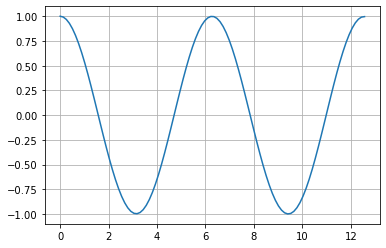

In [50]:
t=linspace(0,4*pi,100)
tray_corta=solucion.sol(t)
plot(t,tray_corta[0])
grid()

In [51]:
solucion

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 36518
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000027486F969D0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.13818742e-02, 1.25200616e-01, ...,
       7.45040335e+02, 7.45158555e+02, 7.45185777e+02])
 t_events: None
        y: array([[ 1.00000000e+00,  9.99935262e-01,  9.92176881e-01, ...,
        -1.34795849e-01, -1.62172320e-02,  1.11826249e-02],
       [ 0.00000000e+00,  1.13816284e-02,  1.24873759e-01, ...,
        -9.84065301e-01, -9.92623723e-01, -9.92589086e-01],
       [ 5.20000000e+00,  5.19999757e+00,  5.19970591e+00, ...,
         1.81742611e+00,  1.76833057e+00,  1.75699957e+00],
       ...,
       [ 1.00000000e+00,  9.99935222e-01,  9.92172124e-01, ...,
        -1.32043758e-01, -1.25419958e-02,  1.50880263e-02],
       [ 0.00000000e+00, -4.27084275e-04, -4.69775479e-03, ...,
        -4.14513623e-01, -4.16058552e-

In [54]:
def raices_Newton_num(f,t0,delta=0.001,d_pos=5,ind_pos=1,error=1e-5): #posición donde queremos que se saquen las raíces usamos pos
    #mapeo en y y vy de la Tierra
    while abs(f(t0)[ind_pos])>error:
    #for i in range(10):
        #df_prima=(f(t0+delta)-f(t0-delta))/(2*delta)
        t0=t0-f(t0)[ind_pos]/f(t0)[d_pos]
    return t0
def t0_raices(t_f,inicio=3):
    tiempos=[]
    while inicio <=t_f:
        tiempos.append(raices_Newton_num(solucion.sol,inicio))
        inicio=tiempos[-1]+3
    return tiempos

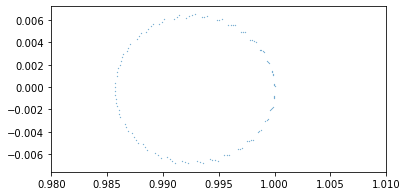

In [55]:
tiempo_mapeo=t0_raices(t_final)
mapeo=zeros((2,len(tiempos_mapeo)))
mapeo[0,:]=solucion.sol(tiempo_mapeo)[0]
mapeo[1,:]=solucion.sol(tiempo_mapeo)[4]
plot(mapeo[0],mapeo[1],'.',markersize=0.5)
xlim([0.98,1.01])
gca().set_aspect('equal')
show()